# Semantic Network Analysis

## Objective:
    - Analyze participant-generated content to identify key solar energy adoption and sustainable living concepts.
    - Visualize the relationships between these concepts using a semantic network graph.

## Dataset:
    - The dataset consists of transcripts stored across 8 Excel files with columns like iteration_cycle, participant_id, transcript, etc.
    - We'll primarily focus on the transcript column for text analysis.
    
## Tools & Libraries:
    - pandas for data manipulation.
    - nltk or spaCy for NLP tasks.
    - networkx and matplotlib/Plotly for creating and visualizing semantic networks.
    - scikit-learn for vectorizing text data (using TF-IDF).
    - pyvis for interactive graph visualization.

## Steps:
    - Data Preprocessing (Cleaning, Tokenization).
    - Concept Extraction (NLP).
    - Building a Semantic Network (Nodes and Edges).
    - Visualization of the network.

# Step-by-Step Analysis Plan

**Step 1: Data Loading and Preprocessing**
Load the Excel files using **pandas** and merge them into a single DataFrame. 

**Step 2: Text Processing and Concept Extraction**
Using **NLP** techniques we can extract key concepts from the transcripts. 

**NLP Techniques**
    - Tokenization, Part-of-Speech (POS) tagging to filter nouns, adjectives, and verbs.
    - Use Named Entity Recognition (NER) to identify key entities like locations, organizations, etc.
    - Extract bigrams and trigrams to capture relevant phrases.

In [15]:
# Install libraries and models
!pip install spacy
!python -m spacy download en_core_web_sm

# # test
# import spacy
# nlp = spacy.load("en_core_web_sm")
# doc = nlp("Solar energy is sustainable and clean.")
# print([token.text for token in doc])

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ------------------- -------------------- 6.3/12.8 MB 43.1 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 40.2 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


**Step 3: Building the Semantic Network**

Use **networkx** to create a semantic network graph to show how words, phrases, or concepts are interconnected based on their meanings or semantic relationships.
    - Nodes represent extracted concepts.
    - Edges represent co-occurrence relationships between concepts within the same transcript.
The weights of the edges can be determined by the frequency of co-occurrence.

**Step 4: Visualizing the Semantic Network**
For visualizing the network, we can use tools like **matplotlib**, **pyvis**, or **Plotly** for interactive graphs.

In [21]:
!pip install pyvis --upgrade

Defaulting to user installation because normal site-packages is not writeable


C:\Users\Shrey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Matplotlib currently does not support Gujarati natively.
  fig.canvas.print_figure(bytes_io, **kw)


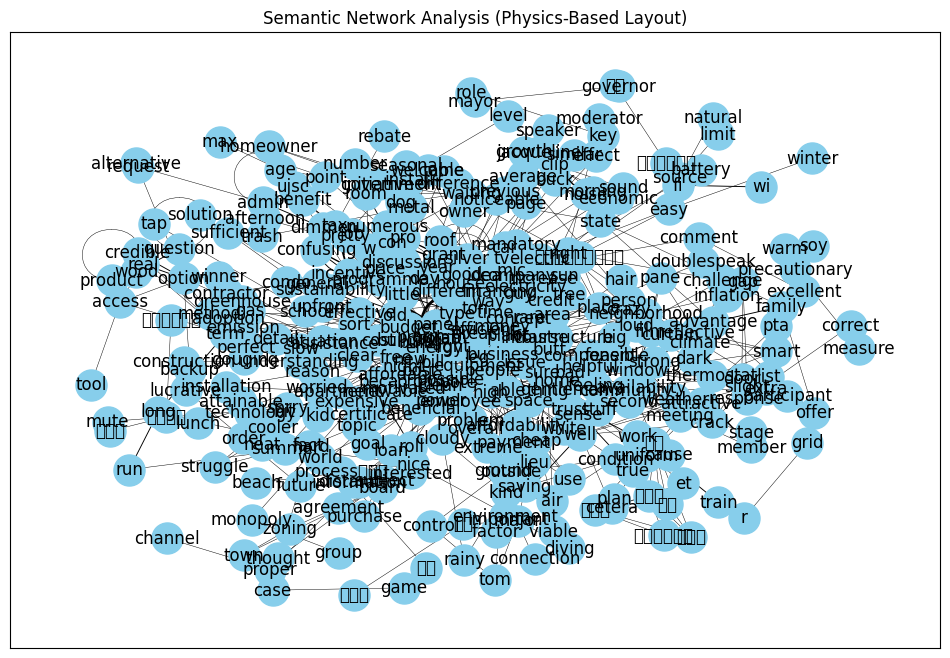

In [39]:
import spacy
import pandas as pd
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Function to process text and extract key concepts (nouns and adjectives)
def extract_concepts(text):
    doc = nlp(text.lower())
    return [token.lemma_ for token in doc if token.pos_ in ['NOUN', 'ADJ'] and not token.is_stop and token.dep_ not in ['aux', 'punct']]

# Load data from your Excel file
file_path = r"C:\Users\Shrey\Documents\Research\Dr. Sun Research\NLP_and_Sentiment_Analysis_Tasks\master-file.xlsx"
df = pd.read_excel(file_path)

# Assuming that the 'transcript' column exists in the data, apply concept extraction
df['concepts'] = df['transcript'].apply(extract_concepts)

# Create an empty graph
G = nx.Graph()

# Build edges based on co-occurrence of concepts
for concepts in df['concepts']:
    for concept1, concept2 in combinations(concepts, 2):
        if G.has_edge(concept1, concept2):
            G[concept1][concept2]['weight'] += 1
        else:
            G.add_edge(concept1, concept2, weight=1)
# Draw the network graph using spring layout (physics-based layout)
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.15, iterations=20)  # `k` controls node distance; `iterations` for convergence

# Get the weights for edges
weights = [G[u][v]['weight'] for u, v in G.edges()]

# Normalize weights for better visualization
max_weight = max(weights) if weights else 1
scaled_weights = [w / max_weight * 10 for w in weights]

# Draw the graph with scaled edge weights
nx.draw_networkx(G, pos, with_labels=True, width=scaled_weights, node_size=500, node_color='skyblue')
plt.title('Semantic Network Analysis (Physics-Based Layout)')

# Save the plot to a file
plt.show()

import warnings

# Suppress specific UserWarnings related to missing glyphs
warnings.filterwarnings("ignore", category=UserWarning, message="Glyph.*missing from font.*")

In [40]:
# Get all unique nodes (words) in the graph
nodes = list(G.nodes())

# Display the list of nodes (words) in the Jupyter Notebook
nodes

['cause',
 'thing',
 'solar',
 'panel',
 'idea',
 'light',
 'bulb',
 'expensive',
 'bill',
 'sure',
 'true',
 'dark',
 'curtain',
 'home',
 'energy',
 'lot',
 'sense',
 'post',
 'power',
 'night',
 'overall',
 'year',
 'house',
 'money',
 'little',
 'silver',
 'well',
 'environment',
 'type',
 'budget',
 'people',
 'free',
 'arm',
 'leg',
 'electricity',
 'kid',
 'school',
 'business',
 'space',
 'butt',
 'ton',
 'employee',
 'cost',
 'wi',
 'fi',
 'car',
 'train',
 'work',
 'discussion',
 'vote',
 'old',
 'pro',
 'con',
 'sorry',
 'prompt',
 'time',
 'sort',
 'sustainability',
 'program',
 'issue',
 'tax',
 'incentive',
 'financing',
 'long',
 'term',
 'confusing',
 'benefit',
 'different',
 'problem',
 'rare',
 'plant',
 'equipment',
 'general',
 'great',
 'board',
 'component',
 'helpful',
 'way',
 'efficient',
 'room',
 'upfront',
 'good',
 'slow',
 'reason',
 'hair',
 'big',
 'pretty',
 'seasonal',
 'right',
 'backup',
 'option',
 'condition',
 'climate',
 'major',
 'factor',
 'pl

In [41]:
# List of words to remove
words_to_remove = ['cause', 'thing', 'idea', 'bill', 'sure', 'true', 'lot', 'sense', 'post', 'overall', 
                   'little', 'silver', 'well', 'type', 'people', 'free', 'kid', 'old', 'pro', 'con', 'sorry', 
                   'prompt', 'time', 'sort', 'issue', 'long', 'term', 'confusing', 'different', 'problem', 
                   'general', 'great', 'board', 'component', 'helpful', 'way', 'room', 'upfront', 'good', 'slow', 
                   'reason', 'hair', 'big', 'pretty', 'right', 'easy', 'clear', 'response', 'correct', 'beca', 
                   'perfect', 'situation', 'et', 'cetera', 'roll', 'new', 'tap', 'pta', 'understanding', 'bad', 
                   'gouging', 'run', 'hard', 'crazy', 'previous', 'page', 'similar', 'motivated', 'doublespeak', 
                   'lunch', 'stuff', 'average', 'gentleman', 'group', 'feeling', 'order', 'extra', 'owner', 
                   'worried', 'increase', 'એવું', 'વગર', 'વર્કના', 'ડિસ્કસ', 'પણ', 'કરો', 'આમ', 'કે', 'હું', 
                   'કરે', 'તો', 'શું', 'તડલાઇન', 'jacqueline', 'ટેબલગેટું', 'છે', 'processમાં', 'clean', 
                   'number', 'detail', 'kind', 'offer', 'topic', 'w', 'waiting', 'comment', 'diving', 'welcome', 
                   'table', 'request', 'second', 'stage', 'slight', 'gap', 'bit', 'struggle', 'reflective', 'film', 
                   'crack', 'condo', 'tom', 'tv', 'sound', 'clip', 'winter', 'outside', 'tool', 'smart', 'lieu', 
                   'ujsc', 'white', 'interested', 'numerous', 'goal', 'mute', 'thought', 'subject', 'course', 
                   'question', 'wood', 'able', 'list', 'game', 'excellent', 'loud', 'possible', 'mic', 'speaker', 
                   'proper', 'channel', 'use', 'fact', 'guy', 'grid', 'r', 'dog', 'buck']

# Filter out the words to remove from the graph's nodes
filtered_nodes = [node for node in G.nodes() if node not in words_to_remove]

# Display the filtered list of nodes
filtered_nodes


['solar',
 'panel',
 'light',
 'bulb',
 'expensive',
 'dark',
 'curtain',
 'home',
 'energy',
 'power',
 'night',
 'year',
 'house',
 'money',
 'environment',
 'budget',
 'arm',
 'leg',
 'electricity',
 'school',
 'business',
 'space',
 'butt',
 'ton',
 'employee',
 'cost',
 'wi',
 'fi',
 'car',
 'train',
 'work',
 'discussion',
 'vote',
 'sustainability',
 'program',
 'tax',
 'incentive',
 'financing',
 'benefit',
 'rare',
 'plant',
 'equipment',
 'efficient',
 'seasonal',
 'backup',
 'option',
 'condition',
 'climate',
 'major',
 'factor',
 'place',
 'electric',
 'battery',
 'neighborhood',
 'uniform',
 'attractive',
 'nice',
 'neat',
 'concept',
 'contractor',
 'max',
 'age',
 'point',
 'initiative',
 'homeowner',
 'government',
 'tree',
 'grant',
 'infrastructure',
 'company',
 'credit',
 'governor',
 'mayor',
 'plan',
 'meeting',
 'zoning',
 'town',
 'construction',
 'member',
 'community',
 'feasible',
 'important',
 'world',
 'challenge',
 'precautionary',
 'measure',
 'natural'

In [42]:
import spacy
import pandas as pd
import networkx as nx
from itertools import combinations
from pyvis.network import Network

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Function to process text and extract key concepts (nouns and adjectives)
def extract_concepts(text):
    doc = nlp(text.lower())
    return [token.lemma_ for token in doc if token.pos_ in ['NOUN', 'ADJ'] and not token.is_stop and token.dep_ not in ['aux', 'punct']]

# Load data from your Excel file
file_path = r"C:\Users\Shrey\Documents\Research\Dr. Sun Research\NLP_and_Sentiment_Analysis_Tasks\master-file.xlsx"
df = pd.read_excel(file_path)

# Assuming that the 'transcript' column exists in the data, apply concept extraction
df['concepts'] = df['transcript'].apply(extract_concepts)

# Create an empty graph
G = nx.Graph()

# Build edges based on co-occurrence of concepts
for concepts in df['concepts']:
    for concept1, concept2 in combinations(concepts, 2):
        if G.has_edge(concept1, concept2):
            G[concept1][concept2]['weight'] += 1
        else:
            G.add_edge(concept1, concept2, weight=1)

# List of words to remove
words_to_remove = ['cause', 'thing', 'idea', 'bill', 'sure', 'true', 'lot', 'sense', 'post', 'overall', 
                   'little', 'silver', 'well', 'type', 'people', 'free', 'kid', 'old', 'pro', 'con', 'sorry', 
                   'prompt', 'time', 'sort', 'issue', 'long', 'term', 'confusing', 'different', 'problem', 
                   'general', 'great', 'board', 'component', 'helpful', 'way', 'room', 'upfront', 'good', 'slow', 
                   'reason', 'hair', 'big', 'pretty', 'right', 'easy', 'clear', 'response', 'correct', 'beca', 
                   'perfect', 'situation', 'et', 'cetera', 'roll', 'new', 'tap', 'pta', 'understanding', 'bad', 
                   'gouging', 'run', 'hard', 'crazy', 'previous', 'page', 'similar', 'motivated', 'doublespeak', 
                   'lunch', 'stuff', 'average', 'gentleman', 'group', 'feeling', 'order', 'extra', 'owner', 
                   'worried', 'increase', 'એવું', 'વગર', 'વર્કના', 'ડિસ્કસ', 'પણ', 'કરો', 'આમ', 'કે', 'હું', 
                   'કરે', 'તો', 'શું', 'તડલાઇન', 'jacqueline', 'ટેબલગેટું', 'છે', 'processમાં', 'clean', 
                   'number', 'detail', 'kind', 'offer', 'topic', 'w', 'waiting', 'comment', 'diving', 'welcome', 
                   'table', 'request', 'second', 'stage', 'slight', 'gap', 'bit', 'struggle', 'reflective', 'film', 
                   'crack', 'condo', 'tom', 'tv', 'sound', 'clip', 'winter', 'outside', 'tool', 'smart', 'lieu', 
                   'ujsc', 'white', 'interested', 'numerous', 'goal', 'mute', 'thought', 'subject', 'course', 
                   'question', 'wood', 'able', 'list', 'game', 'excellent', 'loud', 'possible', 'mic', 'speaker', 
                   'proper', 'channel', 'use', 'fact', 'guy', 'grid', 'r', 'dog', 'buck']

# Filter out the words to remove from the graph's nodes
filtered_nodes = [node for node in G.nodes() if node not in words_to_remove]

# Create PyVis Network object
net = Network(notebook=True)

# Add nodes and edges to the PyVis network
for node in filtered_nodes:
    net.add_node(node)

for concept1, concept2 in G.edges():
    if concept1 in filtered_nodes and concept2 in filtered_nodes:
        weight = G[concept1][concept2]['weight']
        net.add_edge(concept1, concept2, weight=weight)

# Set the physics layout
net.force_atlas_2based()

# Show the network
net.show("semantic_network.html")


semantic_network.html
